---
title: Frames, Basis Vectors, and Vectors
---

## Frames

When analyzing a system, sometimes it's convenient or simple to represent a system in a specific way.  We all know of the Cartesian system of coordinates which span a three dimensional space, but did you know that there are an infinte number of ways to describe that same space?  Just as we are familiar with the x,y, and z directions, we can use different reference frames to navigate and represent the same coordinates and vectors in different ways.

Take the example of your professor standing in front of you, giving a lecture.  If both of you were to stretch your right hand out to your right, you wouldn't be pointing in the same direction.  To get to the door behind youyour professor would say go forward.  Direction is relative to each of you based on your frame of reference.

Sometimes the ability to select your directional representation is useful in dynamics, because depending on the representation, it may take many more or far fewer variables to do so.  For example, when discussing the motion of a plane or car, it is often useful to describe the forces acting on the plane from the car's perspective, even if you're more interested in where the plane goes relative to your perspective standing on the ground.  The planes perspective and the grounds perspective, in terms of their directional components, can be considered separate reference frames.

## Basis Vectors
The purpose of a reference frame is to hold a set of unique *basis vectors* which in linear algebra terms span an $R^3$ space.  As long as these basis vectors span the space, they are capable of describing any vector within that space, a minimum requirement for a 3 dimensional reference frame.  However, there are some other useful qualities of these basis vectors which typically make life easier, which are also enforced in *pynamics*.

**Orthogonal:**  The basis vectors in an orthogonal reference frame are themselves orthogonal, or mutually perpendicular to each other.  This means that there are no shared components of vectors; each basis vector is completely independent of each other.  a more mathy way to describe this is that $\vec{b}_1 \cdot \vec{b}_2 =0$, where $\vec{b}_1$ and $\vec{b}_2$ are any two basis vectors in a reference frame.

**Normal:** Basis vectors in a pynamics reference frame are *normal*, meaning their lengths have been normalized.  They are *unit vectors*.

In Pynamics, frames are implemented as a Python class, and serve to hold three *orthonormal* (orthogonal and normal) vectors.  Frames can be named when created, and no two names can be the same; this name is applied to the x,y, and z basis vectors in each frame.  Thus, no two basis vectors may be named the same in *pynamics*.

## Vectors

Vectors in *pynamics* are represented as linear combinations of basis vectors from one or more frames.  Once frames are created, the basis vectors they contain may be combined with other literal or symbolic variables to create symbolic vector expressions.

Vectors are represented as a Python class, and leverage the ability to overload Python's mathematical operators with other functionality.  In this way, common operators such as $+$,$-$,$*$ and $/$ take on their own meaning when used in expressions with scalars, vectors, dyads, or dyadics.  In this way

Vectors cannot be created without a reference frame.  Therefore, each frame supplies three orthogonal unit basis vectors which contain all the frame's information and which can be used to construct a vector.  

## Math
Vectors have a number of general properties that are all made possible in pynamics.  Below is a list of valid operations and their result.

| Operation | Operator | Other  | Vector Order | Result                           | Commutative |
|:----------|:---------|:-------|:-------------|:---------------------------------|:------------|
| Addition  | +        | vector | before       | $\vec{v}+\vec{v}_{other}$        | y           |
| Addition  | +        | vector | after        | $s\vec{v}$                       | y           |
| Addition  | *        | vector | before       | $s\vec{v}$                       | y           |
| Addition  | *        | vector | after        | $s\vec{v}$                       | y           |
| dot       | .dot()   | vector | before       | $\vec{v}_{other} \cdot \vec{v}$  | y           |
| dot       | .dot()   | vector | after        | $\vec{v} \cdot \vec{v}_{other}$  | y           |
| cross     | .cross() | vector | before       | $\vec{v}_{other} \times \vec{v}$ | n           |
| cross     | .cross() | vector | after        | $\vec{v} \times \vec{v}_{other}$ | n           |

Note: at this time, division with scalars, ie
```{.python}
v/s
```
is not possible.  Instead, simply invert the scalar and then multiply, as with 
```{.python}
(1/s)*v
```

In [1]:
%matplotlib inline
import pynamics
from pynamics.system import System
from pynamics.frame import Frame

system = System()
pynamics.set_system(__name__,system)

A = Frame('A',system);
B = Frame('B',system);
C = Frame('C',system);

Vector addition works out of the box because vectors don't necessarily need to be represented using each others' basis vectors

In [2]:
v = A.x + B.y + C.z;
v

A.x + B.y + C.z

Additionally, multiplication with a scalar works well:

In [3]:
s = 3
print(s*v)
print(v*s)

3*A.x + 3*B.y + 3*C.z
3*A.x + 3*B.y + 3*C.z


Furthermore, dot and cross product works well for vectors expressed by the same basis vectors:

In [4]:
v1 = 1*A.x+2*A.y
v2 = 3*A.z+4*A.x
print(v1.dot(v2))
print(v1.cross(v2))

4
6*A.x - 3*A.y - 8*A.z


However, out of the box, performing a dot or cross product with vectors composed of different basis vectors will not work, because a relationship needs to be established between them.  For example, the following code will produce a custom error saying, "Frames don't share a common parent"

```python
v1 = A.x+B.y
v2 = B.z+C.x
print("v1.dot(v2)=",v1.dot(v2))
print("v1.cross(v2)=",v1.cross(v2))
```

This can be addressed by defining a relationship between frames through rotations.

In [5]:
import sympy
a = sympy.symbols('a')
b = sympy.symbols('b')

B.rotate_fixed_axis(A,[0,0,1],a,system)
C.rotate_fixed_axis(B,[0,1,0],b,system)

Now the following code should work

In [6]:
v1 = A.x+B.y
v2 = B.z+C.x
print("v1.dot(v2)=",v1.dot(v2))
print("v1.cross(v2)=",v1.cross(v2))

v1.dot(v2)= cos(a)*cos(b)
v1.cross(v2)= -A.y + B.x*(sin(a)*sin(b) - sin(b) + 1) + B.y*sin(b)*cos(a) + B.z*(sin(a)*cos(b) - cos(b))


## Other Functions
### Express

If enough information is supplied, vectors can also be expressed in other reference frames.  This uses the rotation information stored when the frame rotations are defined to transform all basis vectors stored within a vector type into a desired type.  This can be useful for finding the shortest representation of a vector, or the resulting math.  For example,

In [7]:
print(v1.express(B))
print(v1.express(A))

B.x*cos(a) + B.y*(1 - sin(a))
A.x*(1 - sin(a)) + A.y*cos(a)


produces quite similar size representations, but complex expressions may benefit from shorter representations.  Take this example where v is the cross product of vectors expressed in frames separated by two separate rotations.

In [8]:
v = (A.x+A.y+A.z).cross(C.x+C.y+C.z)
v

B.x*((-sin(a) + cos(a))*(-sin(b) + cos(b)) - 1) + B.y*(-(sin(a) + cos(a))*(-sin(b) + cos(b)) + sin(b) + cos(b)) + B.z*(-(-sin(a) + cos(a))*(sin(b) + cos(b)) + sin(a) + cos(a))

When you express v in A, B, and C basis vectors, you will see that the middle frame is by far the shortest representation

In [9]:
v.express(A)

A.x*(((-sin(a) + cos(a))*(-sin(b) + cos(b)) - 1)*cos(a) - (-(sin(a) + cos(a))*(-sin(b) + cos(b)) + sin(b) + cos(b))*sin(a)) + A.y*(((-sin(a) + cos(a))*(-sin(b) + cos(b)) - 1)*sin(a) + (-(sin(a) + cos(a))*(-sin(b) + cos(b)) + sin(b) + cos(b))*cos(a)) + A.z*(-(-sin(a) + cos(a))*(sin(b) + cos(b)) + sin(a) + cos(a))

In [10]:
v.express(B)

B.x*((-sin(a) + cos(a))*(-sin(b) + cos(b)) - 1) + B.y*(-(sin(a) + cos(a))*(-sin(b) + cos(b)) + sin(b) + cos(b)) + B.z*(-(-sin(a) + cos(a))*(sin(b) + cos(b)) + sin(a) + cos(a))

In [11]:
v.express(C)

C.x*(((-sin(a) + cos(a))*(-sin(b) + cos(b)) - 1)*cos(b) - (-(-sin(a) + cos(a))*(sin(b) + cos(b)) + sin(a) + cos(a))*sin(b)) + C.y*(-(sin(a) + cos(a))*(-sin(b) + cos(b)) + sin(b) + cos(b)) + C.z*(((-sin(a) + cos(a))*(-sin(b) + cos(b)) - 1)*sin(b) + (-(-sin(a) + cos(a))*(sin(b) + cos(b)) + sin(a) + cos(a))*cos(b))

In [12]:
del v,v1,v2,A,B,C,a,b,system

This can have a real-world impact on the time to compute and integrate pynamics expressions

### Derivatives
Vectors can also have their time derivatives taken.  For this to be possible, the variables that define the magnitude and direction of vectors need to be explicitly defined if they are time-differentiable.  For more information on time-differentiable variables, see the variable-types module.

In [13]:
import pynamics

from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant,Variable
from pynamics.system import System

system = System()
pynamics.set_system(__name__,system)

N = Frame('N',system);
A = Frame('A',system);

qA,qA_d,qA_dd = Differentiable('qA',system)
x,x_d,x_dd = Differentiable('x',system)

system.set_newtonian(N)
A.rotate_fixed_axis(N,[0,0,1],qA,system)

pos = x*A.x
vel=pos.time_derivative(N)
acc=vel.time_derivative(N)

print('pos = ',pos)
print('vel = ',vel)
print('acc = ',acc)

pos =  x*A.x
vel =  qA_d*x*A.y + x_d*A.x
acc =  A.x*(-qA_d**2*x + x_dd) + A.y*(2*qA_d*x_d + qA_dd*x)


You can combine derivatives with the express function to print the derivative in other frames

In [14]:
vel.express(N)
acc.express(N)

N.x*(-(2*qA_d*x_d + qA_dd*x)*sin(qA) + (-qA_d**2*x + x_dd)*cos(qA)) + N.y*((2*qA_d*x_d + qA_dd*x)*cos(qA) + (-qA_d**2*x + x_dd)*sin(qA))

and you can combine with the dot product to extract the coeffecients in front of basis vectors:

In [15]:
vx = vel.express(N).dot(N.x)
print(vx)
vy = vel.express(N).dot(N.y)
print(vy)
vz = vel.express(N).dot(N.z)
print(vz)

-qA_d*x*sin(qA) + x_d*cos(qA)
qA_d*x*cos(qA) + x_d*sin(qA)
0


## Use Cases

Vectors are typically used in a number of cases

* describing the kinematics of a structure
* defining the magnitude and direction of a force, or the axis of rotation for a torque.
* vectors may 

## Example of Working With Vectors

In [16]:
import pynamics
from pynamics.system import System
from pynamics.frame import Frame
from pynamics.variable_types import Constant
import sympy
import matplotlib.pyplot as plt
import numpy

In [17]:
system = System()
pynamics.set_system(__name__,system)

In [18]:
a = Constant(3,'a',system)
b = Constant(2,'b',system)
c = Constant(2,'c',system)
d = Constant(3,'d',system)

In [19]:
N = Frame('N',system)

In [20]:
o = 0*N.x+0*N.y
v1 = a*N.x+b*N.y
v2 = c*N.x+d*N.y

In [21]:
v1n = [o,v1]
v1n = [item.subs(system.constant_values) for item in v1n]        
v1n = [(item.dot(N.x),item.dot(N.y)) for item in v1n]
v1n = numpy.array(v1n,dtype=float)
print(v1n)

[[0. 0.]
 [3. 2.]]


In [22]:
v2n = [v2,]
v2n = [item.subs(system.constant_values) for item in v2n]        
v2n = [(item.dot(N.x),item.dot(N.y)) for item in v2n]
v2n = numpy.array(v2n,dtype=float)
print(v2n)

[[2. 3.]]


(-0.15000000000000002, 3.15, -0.15000000000000002, 3.15)

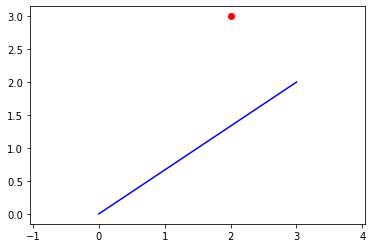

In [23]:
plt.plot(v1n[:,0],v1n[:,1],'b-')
plt.plot(v2n[:,0],v2n[:,1],'ro')
plt.axis('equal')

In [24]:
v3 = v1.dot(v2)/(v1.dot(v1))*v1
print(v3)

a*N.x*(a*c + b*d)/(a**2 + b**2) + b*N.y*(a*c + b*d)/(a**2 + b**2)


In [25]:
v3n = [o,v3]
v3n = [item.subs(system.constant_values) for item in v3n]        
v3n = [(item.dot(N.x),item.dot(N.y)) for item in v3n]
v3n = numpy.array(v3n,dtype=float)
print(v3n)

[[0.         0.        ]
 [2.76923077 1.84615385]]


(-0.15000000000000002, 3.15, -0.15000000000000002, 3.15)

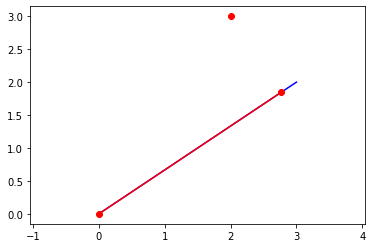

In [26]:
plt.plot(v1n[:,0],v1n[:,1],'b-')
plt.plot(v2n[:,0],v2n[:,1],'ro')
plt.plot(v3n[:,0],v3n[:,1],'ro-')
plt.axis('equal')